In [17]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt #导入plt显示图片，方便在notebook里查看
import random
import numpy as np

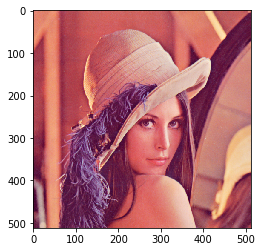

In [2]:
# 读取原始图片
img = cv2.imread("lena_std.tif")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #调换通道使原图颜色显示正常
plt.imshow(img)

## 图像直方图操作

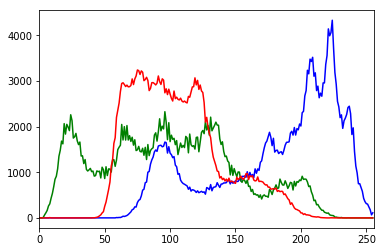

In [4]:
hist = cv2.calcHist([img],#图像
                    [0], #使用的通道
                    None, #没有使用mask
                    [256], #HistSize
                    [0.0,255.0]) #直方图柱的范围

#绘制三通道直方图
color = ("b", "g", "r")
for i, color in enumerate(color):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color = color)
    plt.xlim([0, 256])

### 直方图均衡化（HE）

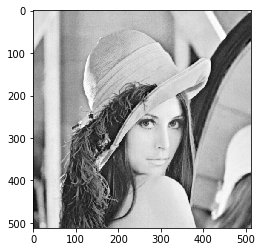

In [6]:
img = cv2.imread("lena_std.tif")

b , g , r = cv2.split(img) #三通道分离
plt.imshow(r, cmap='gray') #显示红通道,选择灰度模式

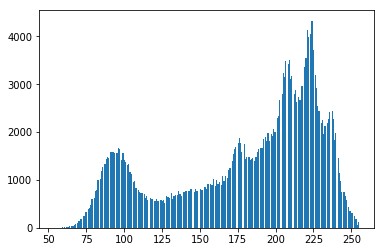

In [7]:
plt.hist(r.ravel(), 256) #显示红通道的直方图
plt.show()

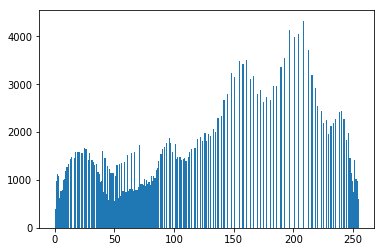

In [8]:
dst = cv2.equalizeHist(r) #对红通道进行直方图均衡化
plt.hist(dst.ravel(), 256)
plt.show()

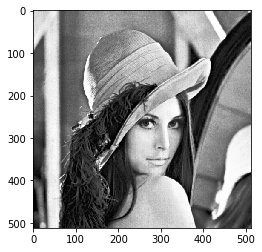

In [9]:
plt.imshow(dst, cmap='gray') #显示均衡化后的图像

## 图像噪声处理

In [40]:
#定义高斯噪声函数
# 向图像中的每个像素点添加随机数，同时限制像素在0-255之间
def gaussian_noise(img, mu, sigma, k):
    rows, cols = img.shape
    img_gaussian_noise = np.zeros((rows, cols)) #产生一个与原图像相同大小的空矩阵，防止原图像被破坏
    for x in range(rows):
        for y in range(cols):
            # 生成高斯分布的随机数，与原始数据相加后要取整
            value = int(img[x, y] + k * random.gauss(mu=mu, sigma=sigma))

            # 限定像素值的为0-255
            img_gaussian_noise[x, y] = np.clip(a_max=255, a_min=0, a=value)
    return img_gaussian_noise

In [45]:
#定义椒盐噪声函数
# 向图像中的随机位置添加黑白像素点，percentage为图像中添加校验像素点的比例
def salt_and_pepper_noise(img, percentage):
    rows, cols = img.shape
    img_sp = img #负值一份，否则会破坏原图像
    num = int(percentage * rows * cols) #添加像素点的个数
    for i in range(num):
        x = random.randint(0, rows - 1)
        y = random.randint(0, cols - 1)
        if random.randint(0, 1):
            img_sp[x, y] = 0  # 黑色噪声
        else:
            img_sp[x, y] = 255  # 白色噪声
    return img_sp

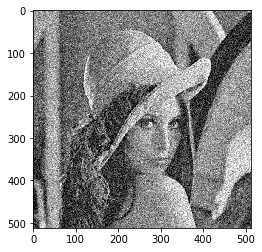

In [42]:
img = cv2.imread("lena_std.tif")
# 转换成灰度图片
imgGrey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 添加高斯噪声
img_gaussian_noise = gaussian_noise(imgGrey, 0, 1, 32)
plt.imshow(img_gaussian_noise, cmap='gray')


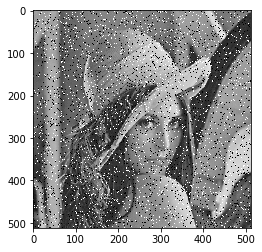

In [46]:
img = cv2.imread("lena_std.tif")
# 转换成灰度图片
imgGrey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 添加椒盐噪声
img_sp = salt_and_pepper_noise(imgGrey, 0.1)
plt.imshow(img_sp, cmap='gray')

## 模糊与滤波
### OpenCV为我们提供了集中滤波方法，如二维卷积、中值滤波、双边滤波、高斯模糊等。

### 对椒盐噪声进行二维卷积和中值滤波

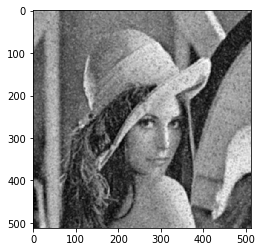

In [71]:
# 二维卷积滤波
# 卷积核（或者是相关核）,一个单通道浮点型矩阵。如果想在图像不同的通道使用不同的kernel，可以先使用split()函数将图像通道事先分开。
kernel = np.ones((5, 5), np.float32) / 25
# 得到一个5*5大小的矩阵作为卷积核，矩阵中的每个值都为0.04
img_conv_2d = cv2.filter2D(img_sp, -1, kernel)
plt.imshow(img_conv_2d, cmap='gray')

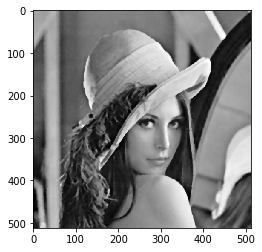

In [72]:
# 中值滤波
# ksize: 滤波模板的尺寸大小，必须是大于1的奇数，如3、5、7……
img_median_blur = cv2.medianBlur(img_sp, 5) # ksize = 5
plt.imshow(img_median_blur, cmap='gray')

### 对高斯噪声进行高斯模糊和双边滤波

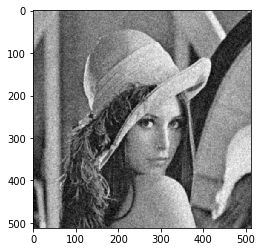

In [73]:
# 高斯模糊
# sigmaX: 高斯核函数在X方向上的标准偏差 
# sigmaY: 高斯核函数在Y方向上的标准偏差，如果sigmaY是0，则函数会自动将sigmaY的值设置为与sigmaX相同的值，如果sigmaX和sigmaY都是0，这两个值将由ksize.width和ksize.height计算而来。
img_gaussian_blur = cv2.GaussianBlur(img_gaussian_noise,(5, 5), 0)
plt.imshow(img_gaussian_blur, cmap='gray')

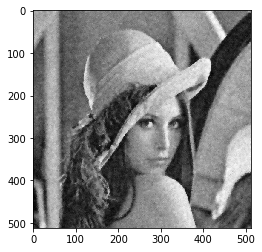

In [74]:
# 双边滤波
# d：邻域直径
# sigmaColor：颜色标准差
# sigmaSpace：空间标准差
img_bilateral_filter = cv2.bilateralFilter(np.array(img_gaussian_noise, dtype = np.uint8), 9, 75, 75) #d = 9,sigmaColor = 75,sigmaSpace = 75
plt.imshow(img_bilateral_filter, cmap='gray')